<a href="https://colab.research.google.com/github/dhar9571/Python---Hotel-Booking-Data-Analysis/blob/main/Capstone_Project_EDA_Hotel_Bookings_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring Hotel Booking Data: A Comprehensive Analysis**

## **Business Problem Overview**

The hotel industry is a highly competitive and dynamic environment, where the demand for rooms is constantly changing based on a variety of factors, such as location, seasonality, events, and economic conditions. Hotels need to understand these factors to effectively manage their room inventory and pricing, and maximize their revenue.

One way for hotels to gain insights into their business is to analyze their booking data. The booking data can provide information about the demand for rooms, the most popular destinations, the length of stay, the booking lead time, and the booking channel. By analyzing this data, hotels can make informed decisions about room inventory management, pricing strategies, and marketing efforts.

However, the booking data is often complex and large, and requires specialized skills and tools to analyze effectively. The goal of this analysis is to uncover insights and patterns in the booking data that can help hotels make data-driven decisions and optimize their business operations.

## **Business Objective**

1. Discover important factors that govern the bookings.
2. Causes of booking cancellations across various aspects.
3. Suitable time to book hotel.

## **GitHub Link -**

profile link: https://github.com/dhar9571

project repository link: https://github.com/dhar9571/HotelBookingAnalysis.git



# **Let's Begin !**

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.express as px

### Dataset Loading

In [2]:
# Load Dataset

# Mounting the google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# importing

data_path = "/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Full Stack Data Science/Module 1/Capstone Project/Hotel Bookings.csv"

data = pd.read_csv(data_path)

### Dataset First View

In [5]:
# Dataset First Look

dataframe = pd.DataFrame(data)

#setting up to show all the columns:
pd.set_option('display.max_columns',32)

dataframe.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count

rows, columns = dataframe.shape

print("rows:",rows)
print("columns:",columns)

rows: 119390
columns: 32


### Dataset Information

In [ ]:
# Dataset Info

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count

len(dataframe[dataframe.duplicated()])

31994

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count

print(dataframe.isna().sum())

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

<Axes: >

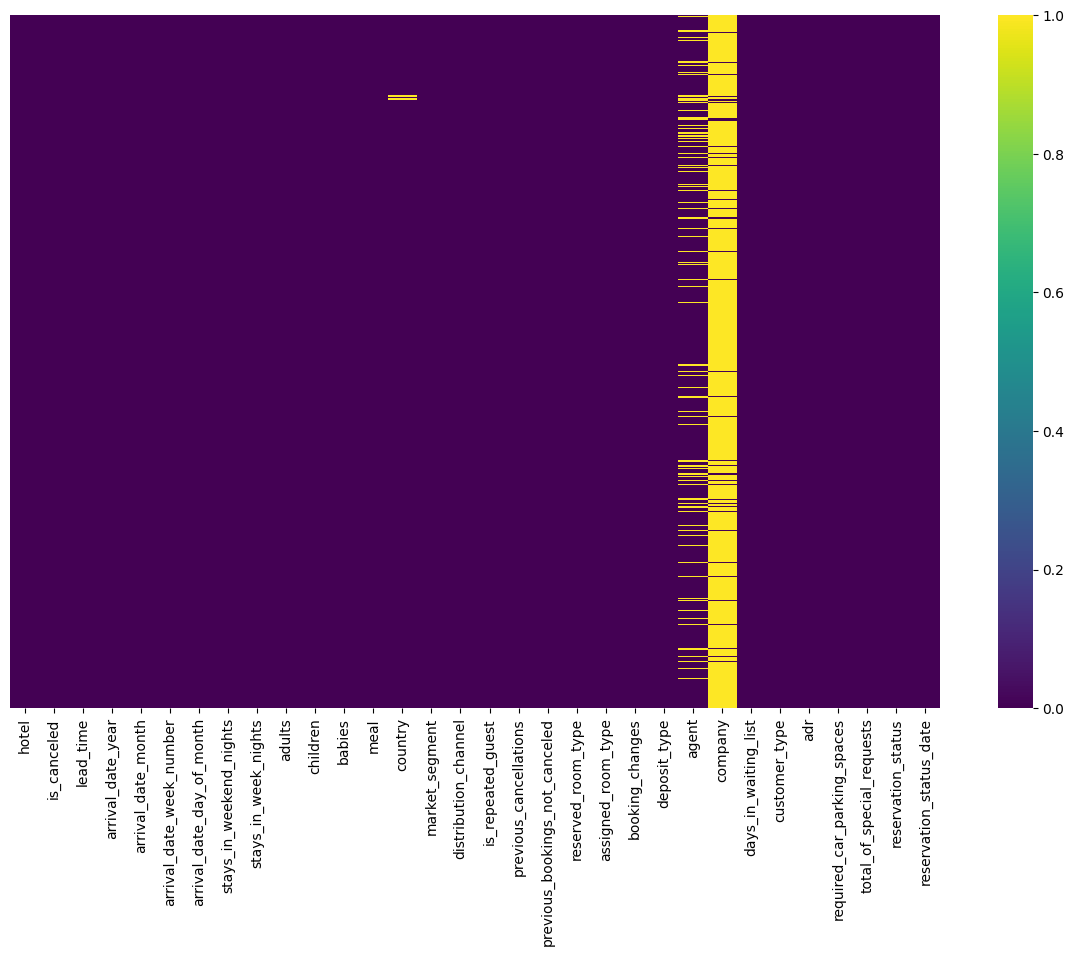

In [ ]:
# visualizing the null values through heatmap

#setting up figure size:
plt.figure(figsize=(15, 9))

sns.heatmap(dataframe.isna(),yticklabels=False,cbar=True,cmap='viridis')

####Why did you pick the specific chart?

######Heatmaps allow us to visualize the missing values in the context of the entire DataFrame, which can be useful for identifying patterns and correlations in the missing data.

####What is/are the insight(s) found from the chart?
###### I am able to identify that in the entire dataframe, "company" column has greatest number of null values. Besides this, "agent" column also have some null values. "country" column has only few null values.

####Will the gained insights help creating a positive business impact?
######Plotting missing values as a heatmap is important for ensuring data quality, cleaning the data, gaining insights, and preparing the data for further analysis or modeling.

### What did you know about your dataset?

1. The dataset contains booking information for a city hotel and a resort hotel and includes information such as when the booking was made, length of stay, the number of adults, children, number of available parking spaces etc.
2. This data has 119390 Rows and 32 Columns.
3. This dataframe has 488 null values in "country" column, 16340 null values in "agent" column and 112593 null values in company column.
4. Null values in "agent" columns predicts that bookings were done directly instead through any agent.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
dataframe.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
# Dataset Describe
dataframe.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


### Variables Description

####**hotel**: Type of the hotel (Resort Hotel or City Hotel)


####**is_canceled**: This column indicates whether the booking was canceled (1) or not (0).

####**lead_time**: This column indicates the number of days that passed between the booking being made and the arrival date.

####**arrival_date_year**: This column indicates the year of the arrival date.

####**arrival_date_month**: This column indicates the month of the arrival date.

####**arrival_date_week_number**: This column indicates the week number of the arrival date.

####**arrival_date_day_of_month**: This column indicates the day of the month of the arrival date.

####**stays_in_weekend_nights**: This column indicates the number of weekend nights that the guests are staying.

####**stays_in_week_nights**: This column indicates the number of week nights that the guests are staying.

####**adults**: This column indicates the number of adults staying in the room.

####**children**: This column indicates the number of children staying in the room.

####**babies**: This column indicates the number of babies staying in the room.

####**meal**: This column indicates the type of meal included in the room rate.

####**country**: This column indicates the country code of origin of the guests.

####**market_segment**: This column indicates the market segment of the guests, such as corporate or online travel agents.

####**distribution_channel**: This column indicates the distribution channel used to make the booking, such as a travel agent or the hotel's website.

####**is_repeated_guest**: This column indicates whether the guests have stayed at the hotel before (1) or not (0).

####**previous_cancellations**: This column indicates the number of bookings the guests have cancelled in the past.

####**previous_bookings_not_canceled**: This column indicates the number of bookings the guests have made in the past that were not cancelled.

####**reserved_room_type**: This column indicates the type of room that was reserved.

####**assigned_room_type**: This column indicates the type of room that was assigned to the guests.

####**booking_changes**: This column indicates the number of changes made to the booking.

####**deposit_type**: This column indicates the type of deposit made for the booking.

####**agent**: This column indicates the identity of the travel agent, if any, who made the booking.

####**company**: This column indicates the identity of the company, if any, that made the booking.

####**days_in_waiting_list**: This column indicates the number of days that the booking was on the waiting list before being confirmed.

####**customer_type**: This column indicates the type of customer, such as a contracted employee or a group.

####**adr**: This column indicates the average daily rate for the room.

####**required_car_parking_spaces**: This column indicates the number of parking spaces required by the guests.

####**total_of_special_requests**: This column indicates the total number of special requests made by the guests.

####**reservation_status**: This column indicates the status of the reservation, such as confirmed or cancelled.

####**reservation_status_date**: This column indicates the date the reservation's status was updated or changed

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.

dataframe.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             5
babies                               5
meal                                 5
country                            177
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
agent                              333
company                            352
days_in_waiting_list     

## 3. ***Data Wrangling***

### Data Wrangling Code

In [8]:
# removing duplicate values:

dataframe = dataframe.drop_duplicates(keep="first")

In [ ]:
# Removing the rows with null values (< 0005% of total length) in "Children" column:

dataframe = dataframe.dropna(subset=["children"])

In [ ]:
# Removing the rows with null values (< 05% of total length) in "country" column:

dataframe = dataframe.dropna(subset=["country"])

In [ ]:
#Dropping "agent" and "company" which have unique IDs and are not important for analysis:

df = dataframe.drop(["agent","company"],axis=1)

In [ ]:
# creating a new column "total guests" which will include both adults and children:

df["total_guests"] = df["adults"] + df["children"] + df["babies"]

# Now dropping adults and children columns:

df = df.drop(["adults","children","babies"],axis=1)

In [ ]:
# removing all rows which are having 0 in total_guests, as it is not contributing in hotel revenue:

df = df[df["total_guests"]>0]

In [ ]:
# Checking unique values in meal column:

df["meal"].value_counts()

BB           91789
HB           14429
SC           10547
Undefined     1165
FB             798
Name: meal, dtype: int64

In [ ]:
# Replacing "undefined" with "BB" as it will not impact the greatest count of BB value in meal column:

df["meal"].replace("Undefined","BB",inplace=True)

In [ ]:
# Converting the 'total_guests' column values from float to integer
df['total_guests'] = df['total_guests'].astype(int)

In [ ]:
# creating two different dataframes for both hotels:

df_resort = df[df["hotel"]=="Resort Hotel"]
df_city = df[df["hotel"]=="City Hotel"]

### What all manipulations have you done and insights you found?

1. Dropped "agent","company" columns due to their no contribution.
2. In "children" column, removed all null values.
3. In "country" column, removed all null values.
4. Created a new column "total_guests" which is the sum of total adults,  children and babies.
5. Dropped "adult", "children" and "babies" columns as already created "total_guests" column.
6. Deleted all the rows which have "total_guests" value as 0 as it will not make any sense to add no guests data for analysis.
7. Meal column has 5 unique values wherein BB has the highest count. Therefore, replaced all "Undefined" values as "BB".
8. Created two different dataframs for both hotels.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'total_guests'],
      dtype='object')

#### Chart - 1 - Correlation Heatmap

In [ ]:
df.nunique()

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             15
stays_in_week_nights                31
meal                                 4
country                            177
market_segment                       7
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                   9
assigned_room_type                  11
booking_changes                     19
deposit_type                         3
days_in_waiting_list               127
customer_type                        4
adr                               8857
required_car_parking_spaces          5
total_of_special_requests            6
reservation_status       

<ipython-input-24-57ca79c5ad6b>:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



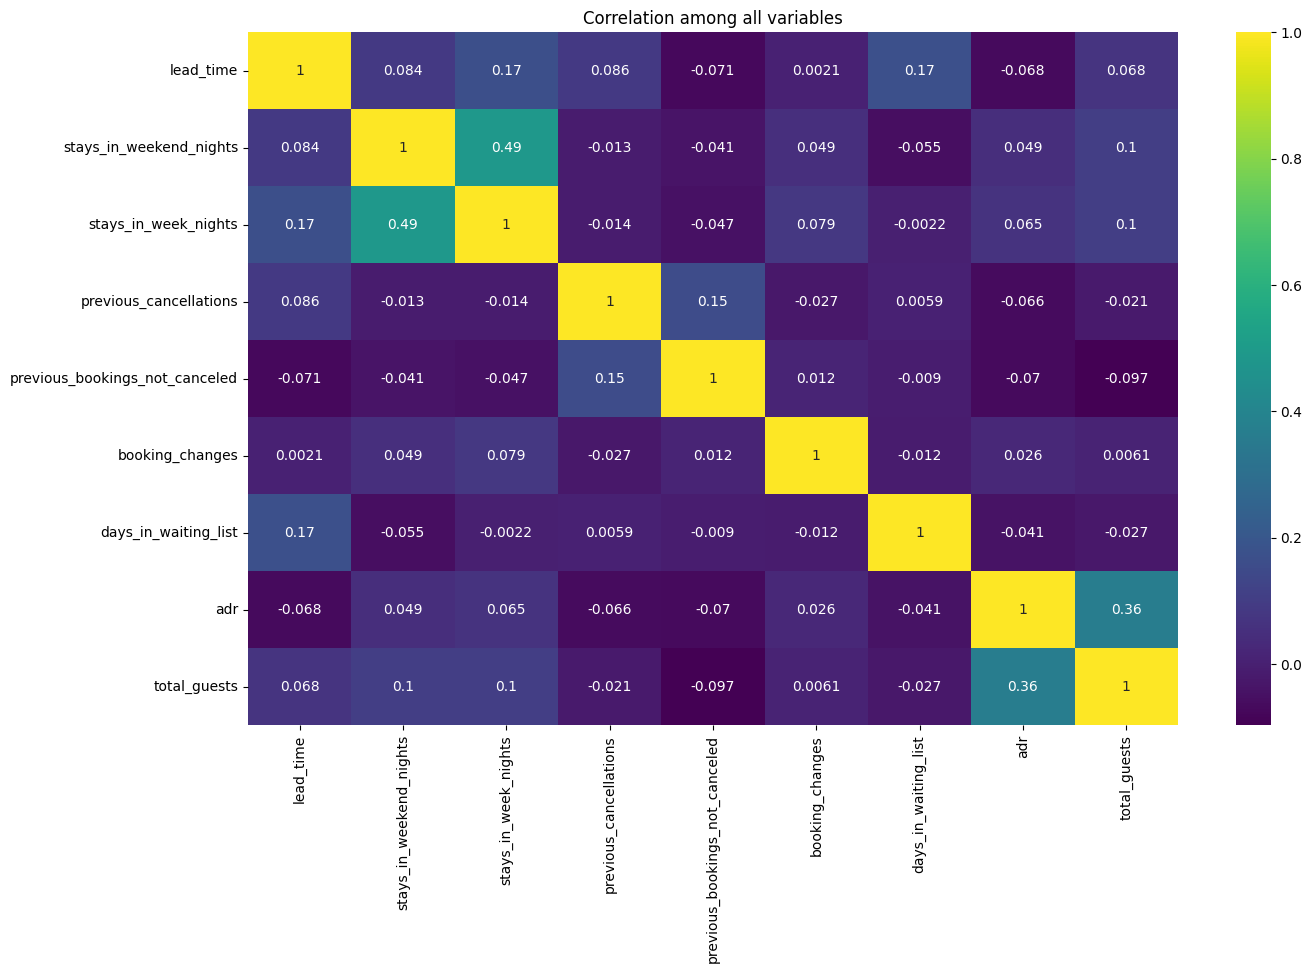

In [ ]:
# creating Correlation heatmap for only numerical columns of the dataframe:
corr = df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'previous_cancellations' , 'previous_bookings_not_canceled',
           "reserved_room_type", 'booking_changes', 'days_in_waiting_list', 'adr', 'reservation_status_date', 'total_guests']].corr()

# Setting up plot size:
plt.rcParams["figure.figsize"]=(15,9)

# Correlation Heatmap visualization code
sns.heatmap(data=corr,cmap='viridis',annot=True,cbar=True)

# setting up plot title:
plt.title("Correlation among all variables")
plt.show()

##### 1. Why did you pick the specific chart?

Heatmaps use colors to represent values, making it easy to visually identify areas of high and low correlation. The use of a color scale allows us to quickly spot patterns and trends in the data.

##### 2. What is/are the insight(s) found from the chart?

1. 'stays_in_week_nights' and 'stays_in_weekend_nights' have positive correlation with each other.
2. total guests and ADR have some positive correlation.
3. previous_bookings not cancelled has positive correlation with repeated guests.

#### Chart - 2 - Top 10 countries with most number of bookings. (Univariate)

In [ ]:
# creating new dataframe to show top 10 countries with their count:

top_10_country = df["country"].value_counts().reset_index()[:10]

# renaming column names:

top_10_country.rename(columns={"index":"country","country":"count"},inplace=True)

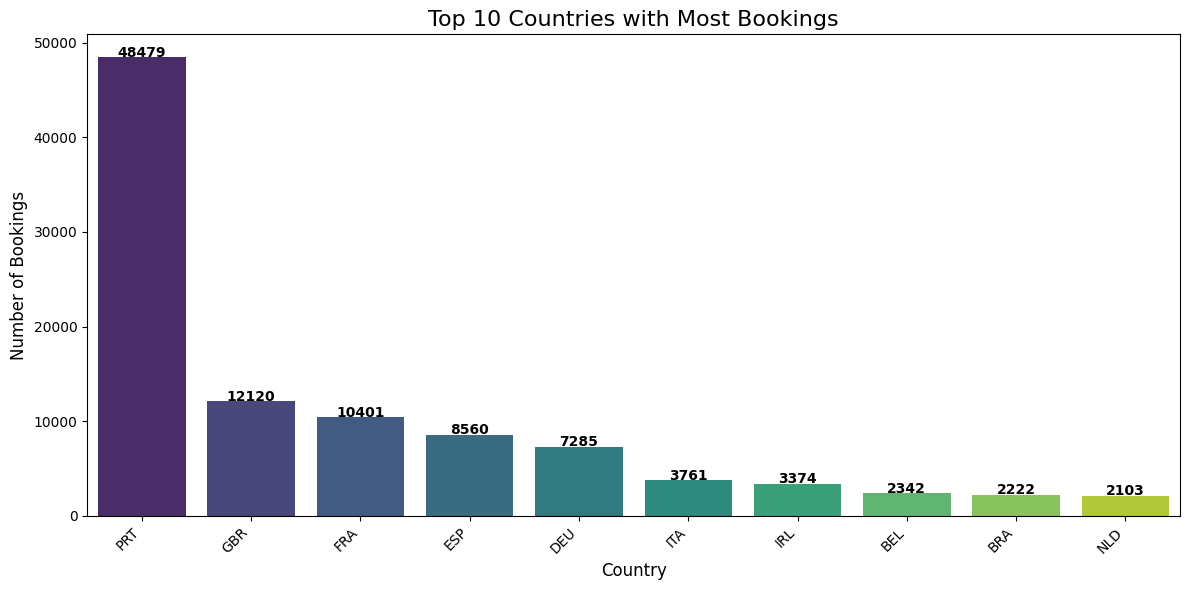

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a barplot with Seaborn

# Adjust the figure size for better visualization
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_country["country"], y=top_10_country["count"], data=df, palette="viridis")  # Use the 'viridis' color palette

# Adding labels and title
plt.title("Top 10 Countries with Most Bookings", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Bookings", fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10, ha="right")

# Adding data labels on top of each bar
for index, row in top_10_country.iterrows():
    plt.text(index, row["count"] + 50, f'{row["count"]}', ha="center", fontsize=10, fontweight="bold", color="black")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart allows for easy comparison among different categories, making it possible to see patterns, trends, and relationships.

##### 2. What is/are the insight(s) found from the chart?

1. Portugal country has the greatest number of customers.
2. 50% of the guests belong to Portugal, Great Britain and France.
3. Most guests belong to European countries.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.



Yes, as almost 50% of the guests belong to European countries, the marketing strategy should be more focused on these countries.

#### Chart - 3 - Total Bookings with Cancellations. (Univariate)


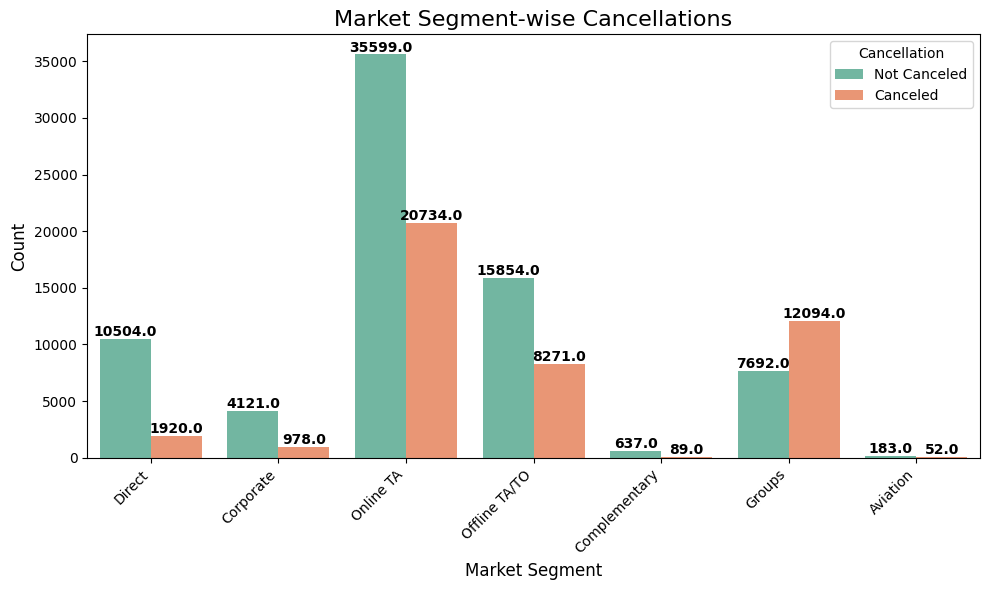

In [ ]:
# Create a countplot for market segment-wise cancellations

# Adjust the figure size for better visualization
plt.figure(figsize=(10, 6))
# Choose a color palette
palette = sns.color_palette("Set2")

ax = sns.countplot(x=df["market_segment"], hue=df["is_canceled"], data=df, palette=palette)

# Adding labels and title
plt.title("Market Segment-wise Cancellations", fontsize=16)
plt.xlabel("Market Segment", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Adding legend and custom labels
plt.legend(title="Cancellation", labels=["Not Canceled", "Canceled"], loc="upper right")

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10, ha="right")

# Removing horizontal gridlines
ax.yaxis.grid(False)

# Adding data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                fontsize=10, fontweight="bold", color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This plot is particularly useful when we have categorical data and want to quickly and easily visualize the count of occurrences for each category.

##### 2. What is/are the insight(s) found from the chart?

1. Online and Offline TA, both has almost 37% and 34% cancellations.
2. Groups segment type has almost 61% cancellations which are very high.

#####3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Cancellations are very high for both. Therefore, City Hotel needs to keep more focus on their guests by providing different perks and offers on booking.

#### Chart - 4 - Top 5 Segments wise booking. (Univariate)

In [ ]:
#Creating a new dataframe which contains the count of each unique values of market_segment column:

market_segment_counts = df["market_segment"].value_counts().reset_index().rename(columns={"index":"market_segment","market_segment":"count"})

# removng rows with Undefined values as it will not impact the overall distribution:

market_segment_counts = market_segment_counts[market_segment_counts["market_segment"]!="Undefined"]

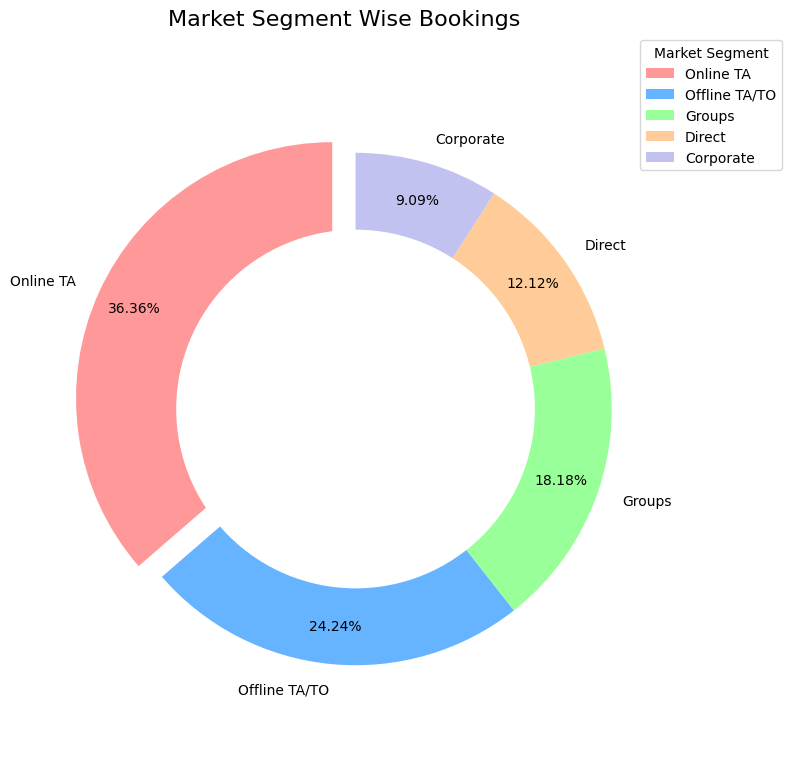

In [ ]:
# Data for the pie chart (example data, replace with your data)
market_segment_counts = {
    "market_segment": ["Online TA", "Offline TA/TO", "Groups", "Direct", "Corporate"],
    "count": [1200, 800, 600, 400, 300]}

# Explode a slice (optional)
explode = (0.1, 0, 0, 0, 0)

# Colors for the slices (optional)
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0']

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size for better visualization
plt.pie(market_segment_counts["count"][:5], labels=market_segment_counts["market_segment"][:5],
        autopct="%.2f%%", startangle=90, pctdistance=0.85, explode=explode, colors=colors)

# Add a circle in the center to make it look like a donut chart (optional)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a legend
plt.legend(title="Market Segment", labels=market_segment_counts["market_segment"][:5], loc="upper left", bbox_to_anchor=(1, 1))

# Setting up plot title
plt.title("Market Segment Wise Bookings", fontsize=16)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Pie/Donut charts are simple and intuitive, making them easy to understand even for people who are not familiar with data visualization.

##### 2. What is/are the insight(s) found from the chart?

Bookings through Online TA are the highest with 36.36% among all type of bookings.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

More focus needs to be given to the Online TA as it has the highest opportunites to improve the booking percentage.

#### Chart - 5 - Relationship between cancellations and market segments. (Bivariate)

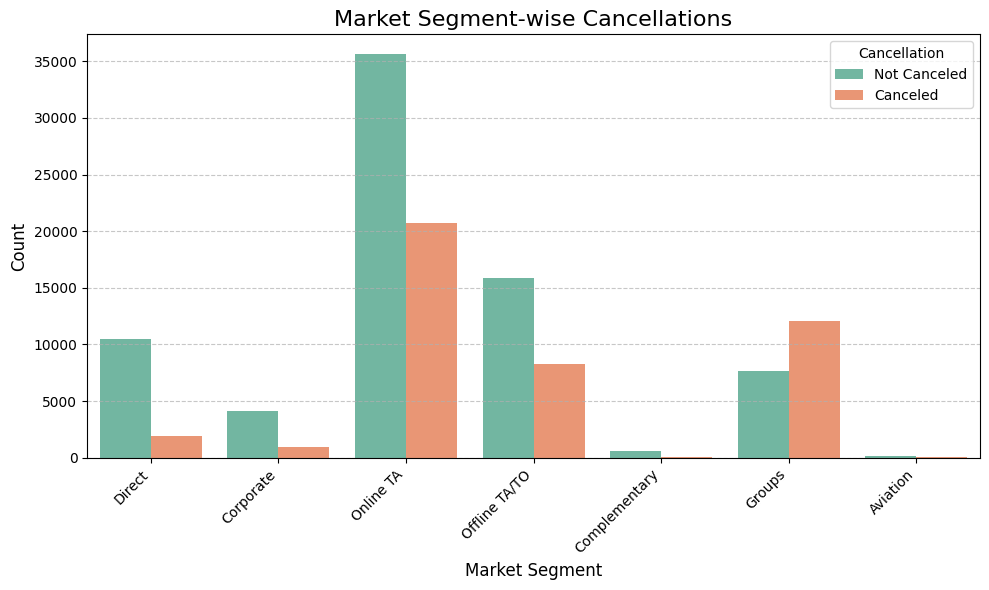

In [ ]:
# Create a countplot for market segment-wise cancellations
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visualization
palette = sns.color_palette("Set2")  # Choose a color palette

sns.countplot(x=df["market_segment"], hue=df["is_canceled"], data=df, palette=palette)

# Adding labels and title
plt.title("Market Segment-wise Cancellations", fontsize=16)
plt.xlabel("Market Segment", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Adding legend and custom labels
plt.legend(title="Cancellation", labels=["Not Canceled", "Canceled"], loc="upper right")

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10, ha="right")

# Adding a grid to improve readability (optional)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Adding data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                fontsize=10, fontweight="bold", color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Countplots are useful for comparing the frequency of different categories.

##### 2. What is/are the insight(s) found from the chart?

1. Groups segment has highest cancellation rate above 50%.
2. Online TA and offline TA both have more than 33% cancellation rate.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

The market segments which have high cancellation rate need more focus on altering cancellation policy.

#### Chart - 6 - Relationship between cancellations and deposit type. (Bivariate)

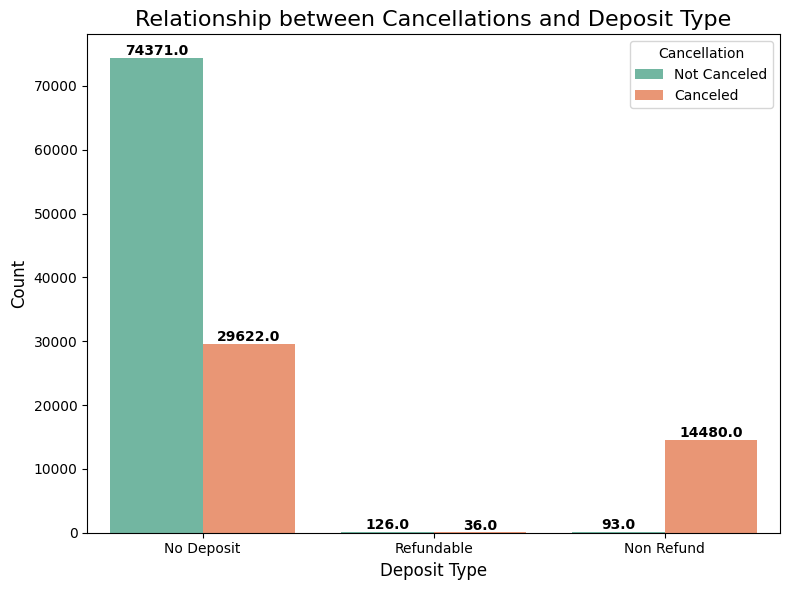

In [ ]:
# Create a countplot to show the relationship between cancellations and deposit type

# Adjust the figure size for better visualization
plt.figure(figsize=(8, 6))

palette = sns.color_palette("Set2")  # Choose a color palette

ax = sns.countplot(x=df["deposit_type"], hue=df["is_canceled"], data=df, palette=palette)

# Adding labels and title
plt.title("Relationship between Cancellations and Deposit Type", fontsize=16)
plt.xlabel("Deposit Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Adding legend and custom labels
plt.legend(title="Cancellation", labels=["Not Canceled", "Canceled"], loc="upper right")

# Removing horizontal gridlines
ax.yaxis.grid(False)

# Adding data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                fontsize=10, fontweight="bold", color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Countplots are useful for comparing the frequency of different categories.

##### 2. What is/are the insight(s) found from the chart?

1. "No Refund" payment type has highest cancellation rate of almost 99%.

2. However, it is a surprize that "Refundable" payment type hase the lowest cancellation rate of less than 1%.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Payment policies should be altered for no refund type, as it has almost every booking cancelled.

#### Chart - 7 - Percentage of distrubtion among different customer types. (Univariate)

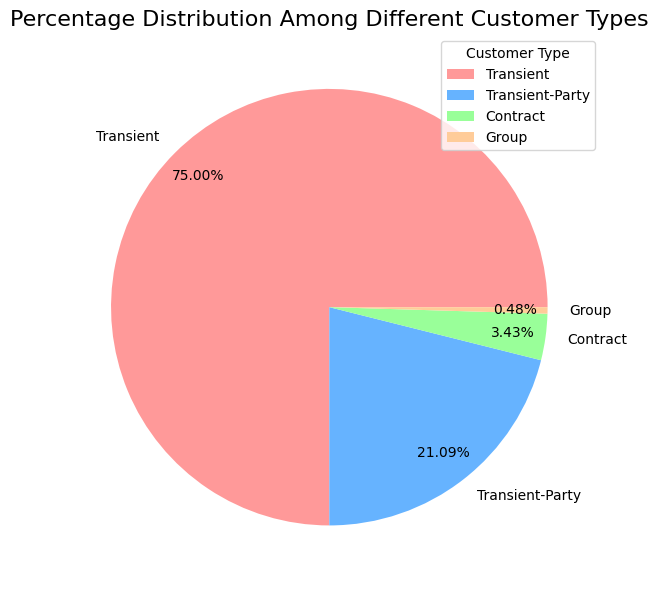

In [ ]:
# Calculate the value counts and percentages
customer_type_counts = df["customer_type"].value_counts()
values = customer_type_counts.values
labels = customer_type_counts.index

# Define custom colors
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']  # Specify different colors

# Create a pie chart with custom colors and rotated by 90 degrees
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visualization
plt.pie(values, labels=labels, autopct="%.2f%%", startangle=0, pctdistance=0.85, colors=colors)

# Adding a legend with custom labels
plt.legend(title="Customer Type", labels=labels, loc="upper right")

# Setting up plot title
plt.title("Percentage Distribution Among Different Customer Types", fontsize=16)

# Ensure the aspect ratio is equal
plt.gca().set_aspect("equal")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts work well with small datasets because they allow to see the entire dataset at once.

##### 2. What is/are the insight(s) found from the chart?

Transient customer types have highest bookings of 75%.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Transient customers should be the main focus when it comes to providing perks/offers.

#### Chart - 8 - Booking trend among all the months. (Bivariate)

In [ ]:
# Creating a new dataframe which contains months names along with their count:

month_count = df["arrival_date_month"].value_counts().reset_index().rename(columns={"index":"month","arrival_date_month":"count"})

# Defining the correct order of months:
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Converting the "month" column to a Categorical data type with the correct ordering
month_count["month"] = pd.Categorical(month_count["month"], categories=month_order)

# Sorting the dataframe by the "month" column
month_count = month_count.sort_values("month")

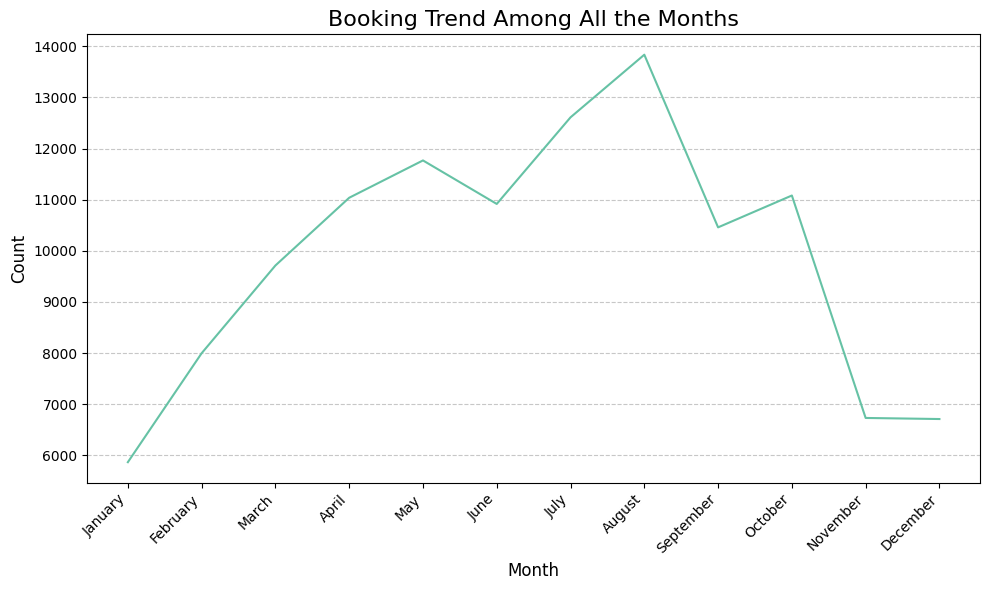

In [ ]:
# Create a lineplot to show the count of arriving customers in different months
# Adjust the figure size for better visualization
plt.figure(figsize=(10, 6))

# Use a visually appealing color palette
palette = sns.color_palette("Set2")[0]

sns.lineplot(x=month_count["month"], y=month_count["count"], data=month_count, color=palette)

# Adding labels and title
plt.title("Booking Trend Among All the Months", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Adding gridlines for better reference
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10, ha="right")

# Ensure the aspect ratio is equal
plt.gca().set_aspect("auto")

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Line plots are ideal for showing how a variable changes over time or across a continuous scale. By connecting data points with lines, line plots provide a clear picture of the trend in the data.

##### 2. What is/are the insight(s) found from the chart?

August month has the highest number of arriving customers and January has the lowest number of customers.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

August month has the highest number of customer and it can be increased more by providing different offers and perks to the customer.

#### Chart - 9 - Countries with count of repeated customers. (Bivariate)

In [ ]:
#creating a new dataframe which contains the name of countries along with the count of repeated customers belong to them:

country_repeated_guests = df.groupby("country")["is_repeated_guest"].sum().reset_index().sort_values("is_repeated_guest",ascending=False).rename(columns={"is_repeated_guest":"count of repeated guests"})

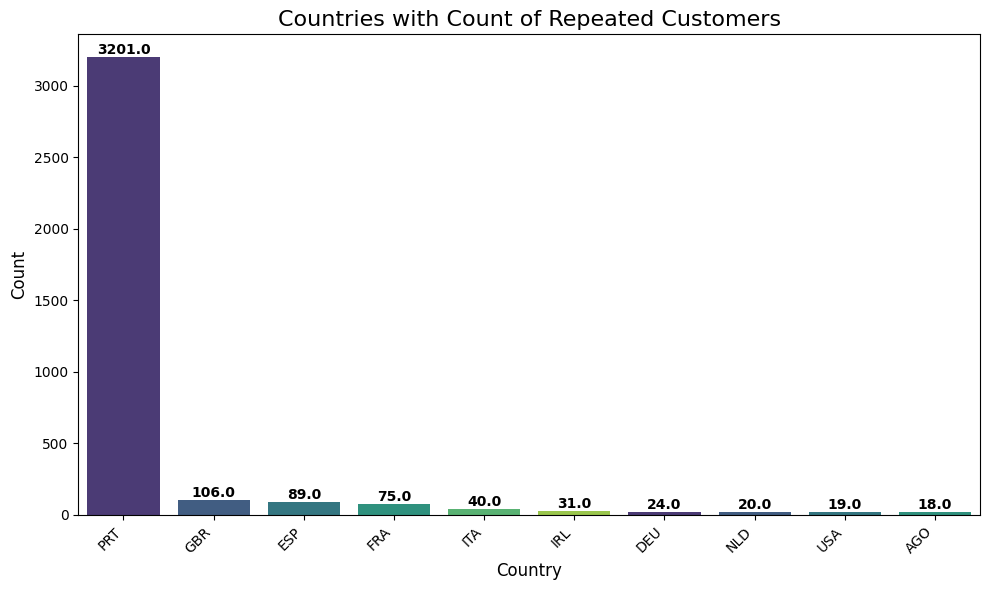

In [ ]:
# plotting top 10 countries with their count of repeated customers:

# Create a barplot to show the countries with the count of repeated customers
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visualization

# Use a visually appealing color palette
palette = sns.color_palette("viridis")

ax = sns.barplot(x=country_repeated_guests["country"].head(10), y=country_repeated_guests["count of repeated guests"].head(10), data=country_repeated_guests, palette=palette)

# Adding labels and title
plt.title("Countries with Count of Repeated Customers", fontsize=16)
plt.xlabel("Country", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10, ha="right")

# Adding data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                fontsize=10, fontweight="bold", color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart allows for easy comparison among different categories, making it possible to see patterns, trends, and relationships.

##### 2. What is/are the insight(s) found from the chart?

PRT has the highest number of repeated 3201 customers.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Customer belong to PRT should be given special discounts/offers to increase their chances to revisit the hotel.

#### Chart - 10 - Hotel wise yearly bookings. (Univariate)

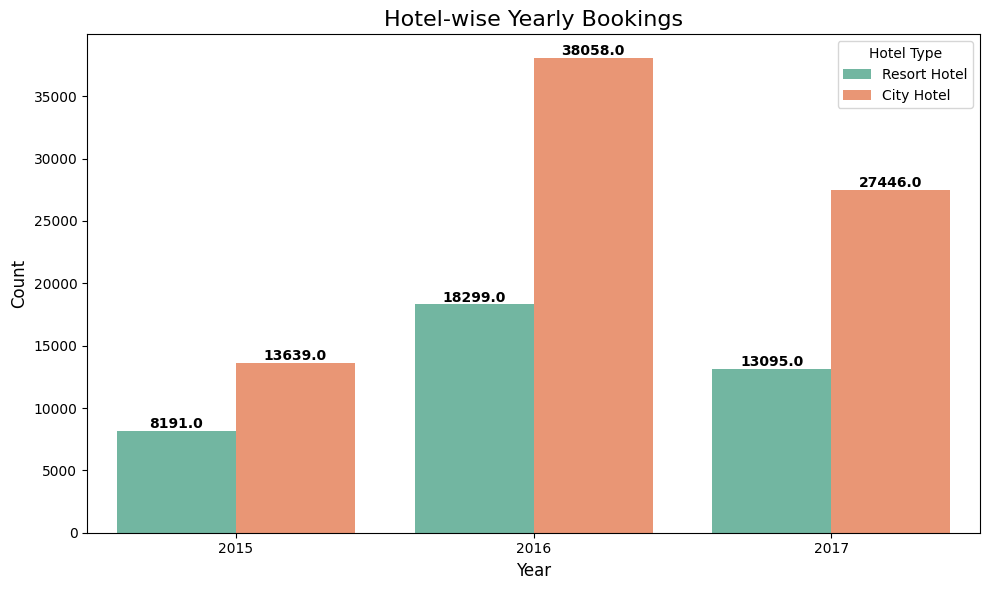

In [ ]:
# Create a countplot to show hotel-wise yearly bookings
plt.figure(figsize=(10, 6))  # Adjust the figure size for better visualization

# Use a visually appealing color palette
palette = sns.color_palette("Set2")

ax = sns.countplot(x=df["arrival_date_year"], data=df, hue=df["hotel"], palette=palette)

# Adding labels and title
plt.title("Hotel-wise Yearly Bookings", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Adding legend and custom labels
plt.legend(title="Hotel Type", labels=["Resort Hotel", "City Hotel"], loc="upper right")

# Rotating x-axis labels for better readability
plt.xticks(rotation=0, fontsize=10)

# Adding data labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center',
                fontsize=10, fontweight="bold", color='black', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Countplots are useful for comparing the frequency of different categories.

##### 2. What is/are the insight(s) found from the chart?

1. For all the years, City hotel has higher bookings compared to Resort hotel.
2. Year 2016 has highest number of bookings compared to other years.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

City Hotel has great opportunities to attract more and more customers.

#### Chart - 11 - Price variation for all the months. (Bivariate)

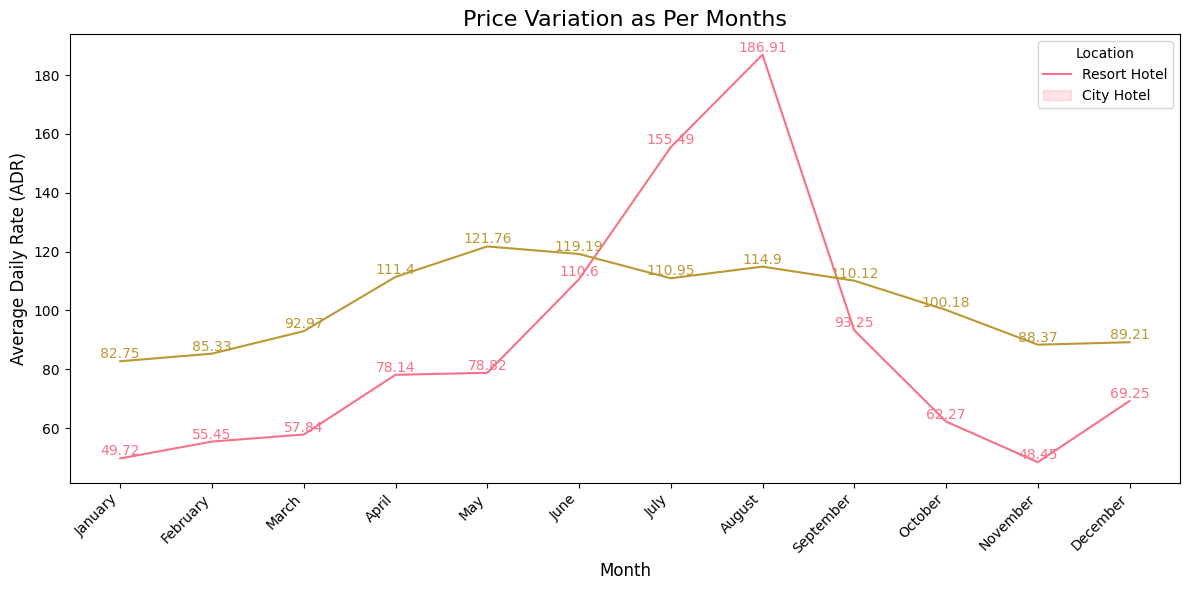

In [ ]:
# Create new dataframes for mean adr by month for both hotel types
resort_month_adr = df_resort.groupby("arrival_date_month")["adr"].mean().round(2).reset_index()
city_month_adr = df_city.groupby("arrival_date_month")["adr"].mean().round(2).reset_index()

# Define the correct order of months
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Convert the "month" column to a Categorical data type with the correct ordering
resort_month_adr["arrival_date_month"] = pd.Categorical(resort_month_adr["arrival_date_month"], categories=month_order)
city_month_adr["arrival_date_month"] = pd.Categorical(city_month_adr["arrival_date_month"], categories=month_order)

# Sort the dataframes by the "month" column
resort_month_adr = resort_month_adr.sort_values("arrival_date_month")
city_month_adr = city_month_adr.sort_values("arrival_date_month")

# Create a lineplot to show price variation for all the months
plt.figure(figsize=(12, 6))  # Adjust the figure size for better visualization

# Use visually appealing color palettes for the lines
palette = sns.color_palette("husl")

sns.lineplot(x=resort_month_adr["arrival_date_month"], y=resort_month_adr["adr"], data=resort_month_adr, label="Resort", color=palette[0])
sns.lineplot(x=city_month_adr["arrival_date_month"], y=city_month_adr["adr"], data=city_month_adr, label="City", color=palette[1])

# Adding labels and title
plt.title("Price Variation as Per Months", fontsize=16)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Average Daily Rate (ADR)", fontsize=12)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10, ha="right")

# Adding legends with custom labels
plt.legend(title="Location", labels=["Resort Hotel", "City Hotel"])

# Adding data labels on top of each line (optional)
for idx, row in resort_month_adr.iterrows():
    plt.text(row["arrival_date_month"], row["adr"], str(row["adr"]), va="bottom", ha="center", fontsize=10, color=palette[0])
for idx, row in city_month_adr.iterrows():
    plt.text(row["arrival_date_month"], row["adr"], str(row["adr"]), va="bottom", ha="center", fontsize=10, color=palette[1])

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Line plots are ideal for showing how a variable changes over time or across a continuous scale. By connecting data points with lines, line plots provide a clear picture of the trend in the data.

##### 2. What is/are the insight(s) found from the chart?

Prices in the Resort Hotel are much higher during the summer and prices of city hotel varies less and is most expensive during Spring and Autumn and these vary with room type and meal type.

##### 3. Will the gained insights help creating a positive business impact? Are there any insights that lead to negative growth? Justify with specific reason.

Prices are high during the peak season. if reduced, the number of bookings can be increased drastically.

#### Chart - 12 - Pair Plot (Multivariate)

Text(0.5, 1.0, 'Pair Plot')

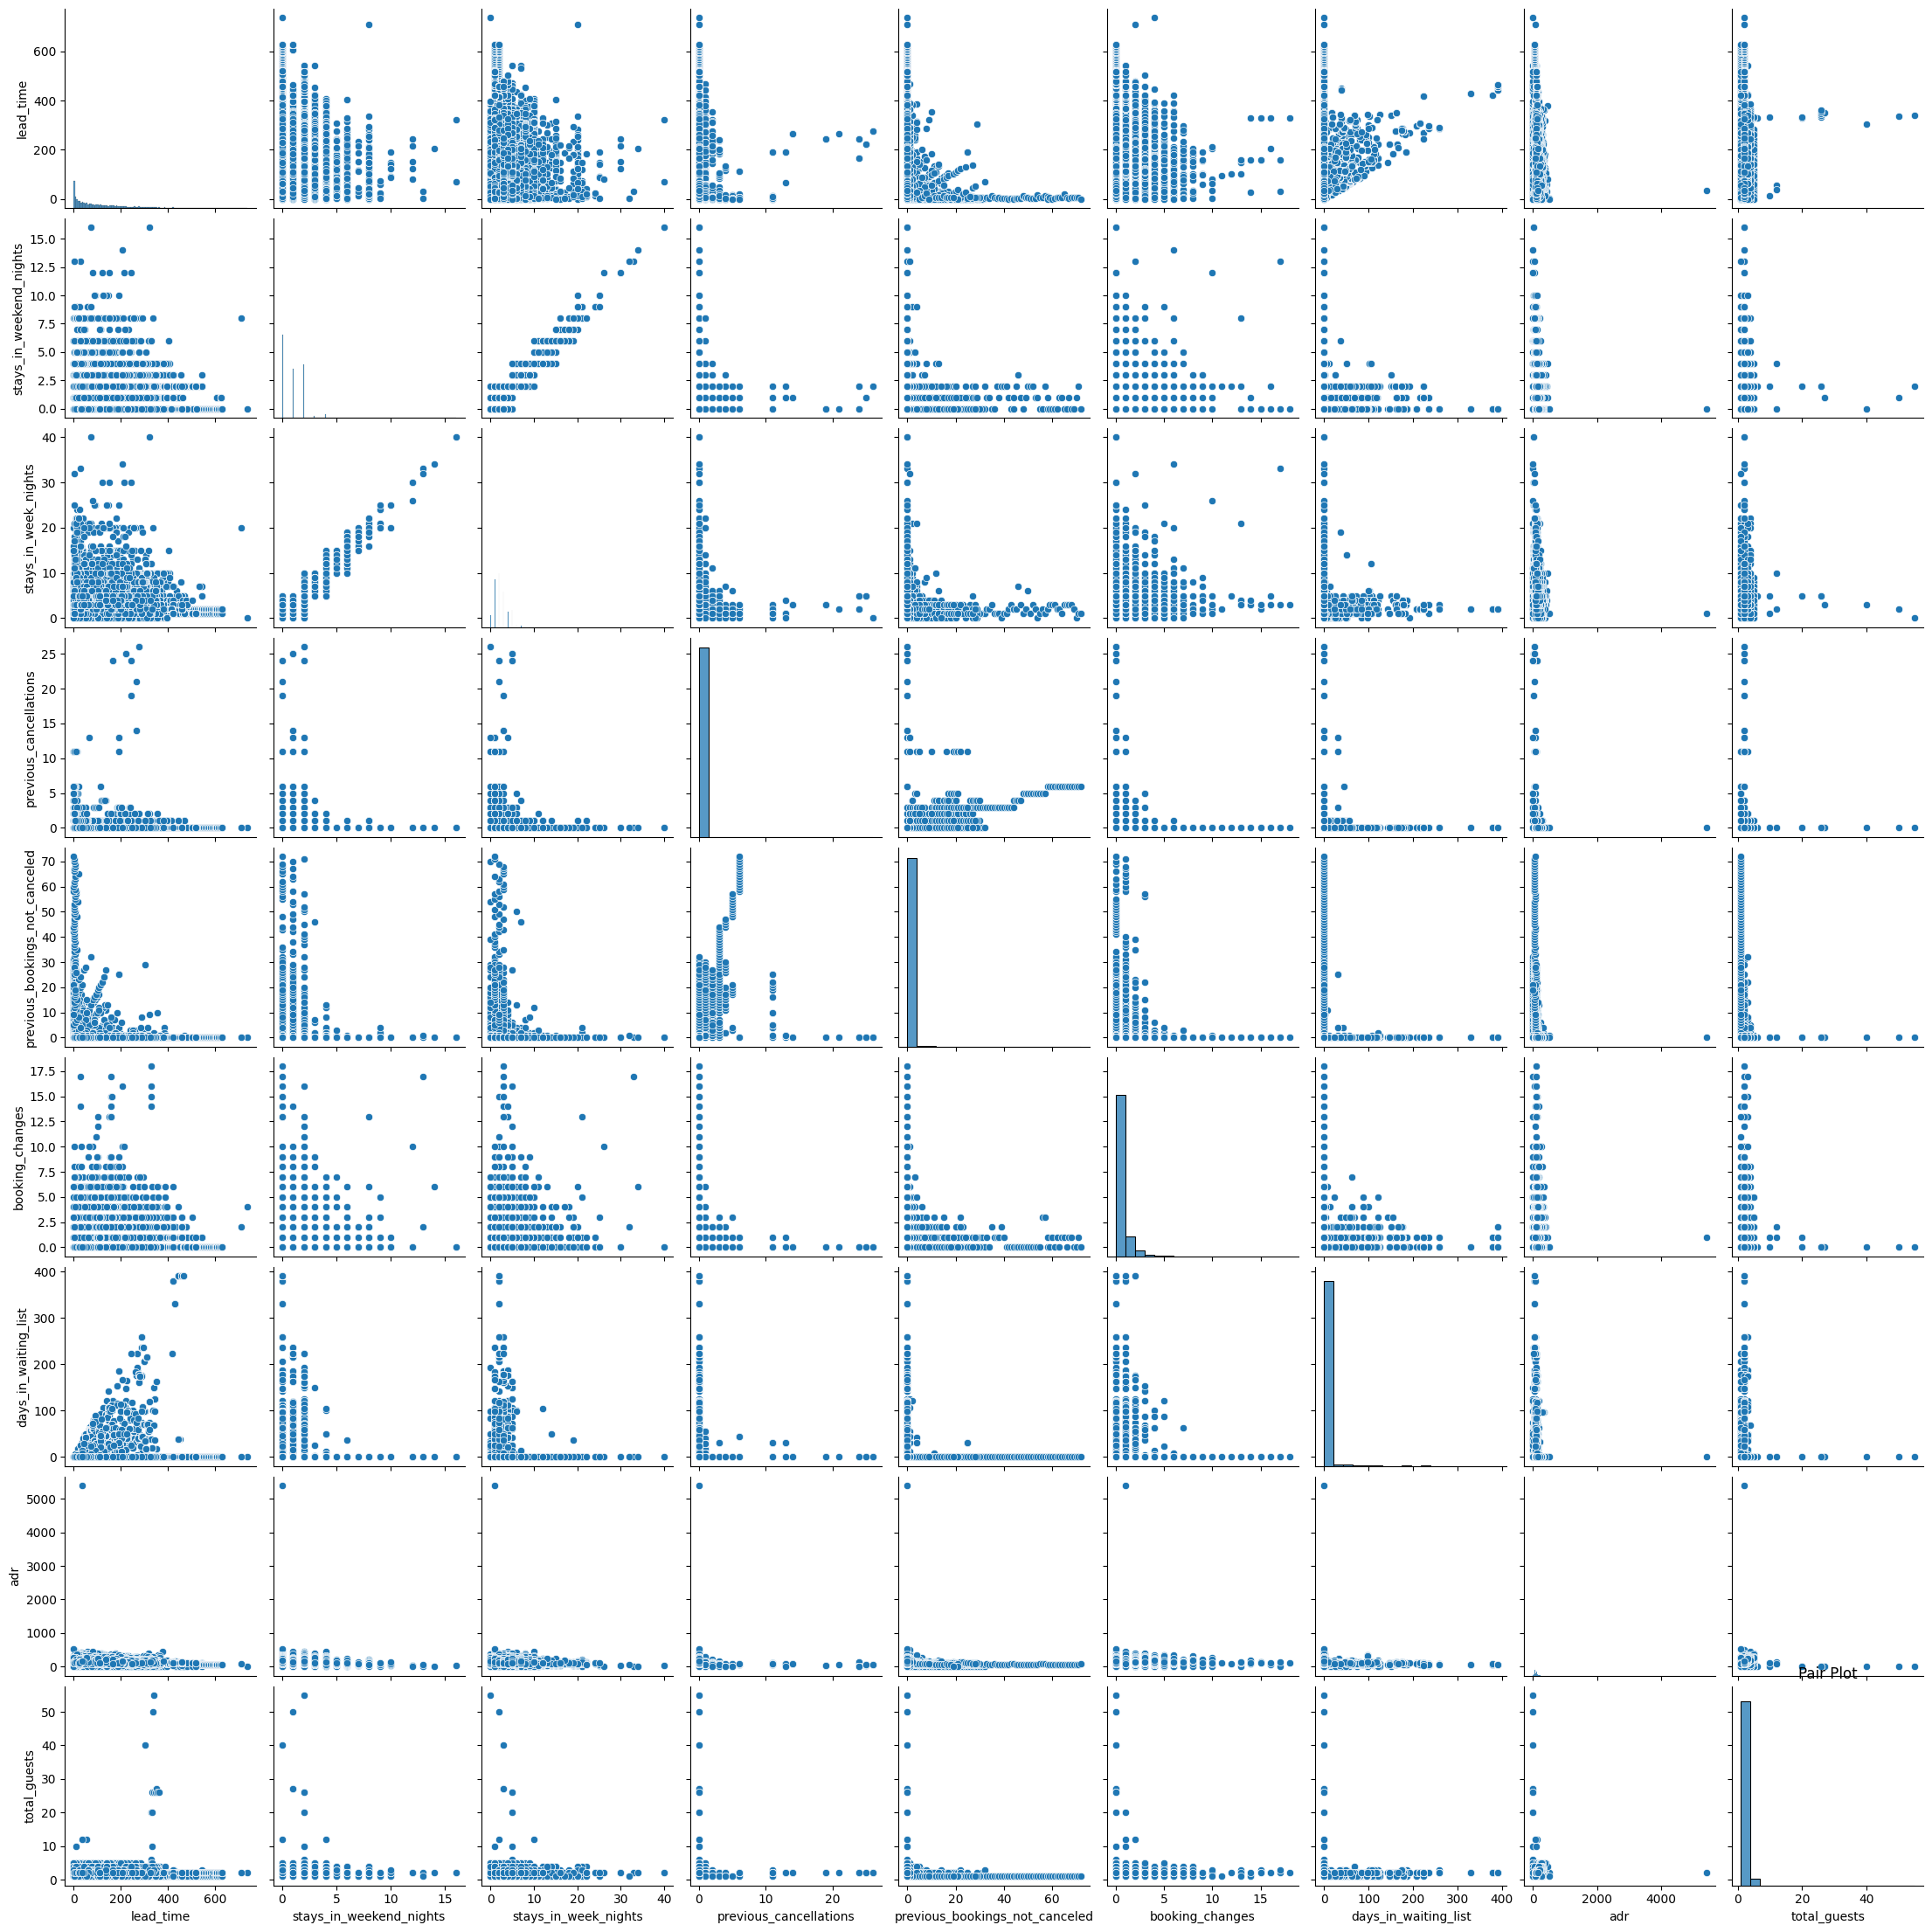

In [ ]:
# creating a pair plot for all numerical columns:

sns.pairplot(df[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'previous_cancellations' , 'previous_bookings_not_canceled',
           "reserved_room_type", 'booking_changes', 'days_in_waiting_list', 'adr', 'reservation_status_date', 'total_guests']])

# Mentioning a title for the plot:

plt.title("Pair Plot")

##### 1. Why did you pick the specific chart?

Pair plots are particularly useful when exploring the relationships between multiple variables in a dataset, as they can help identify patterns and correlations between variables. They can also be used to detect outliers and anomalies in the data.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

1. No deposit type has the most cancellations. Therefore, changes in the no deposit type method are crucial so that cancellations can be reduced.
2. Most of the customers are transient types from European countries with offline/online TA segment. Therefore, these customers should be provided with more perks/offers if booking through offline/online TA, so the bookings can be increased.
3. June to August are the peak months in which bookings are higher even though the prices are higher during this period. Therefore, if prices are reduced for both the hotels, more bookings can be made by the customers.

# **Conclusion**

1. A minimum amount should be charged for long lead time to reduce the chances of cancellations.
2. There should be a fixed amount to be charged instead of no deposit to reduce to cancellations.
3. To improve the number of bookings, transient customers from European regions who come in peak season through offline/online TA, should be provided with extra benefits/offers/perks in order to improve number of bookings.